# Personalized Fashion Recommendation based on purchase History

**Exploratory Data Analysis (EDA)**

This notebook performs an in-depth **Exploratory Data Analysis (EDA)** of the H&M dataset, which includes customer demographics, product metadata, and transaction history. Using AutoEDA/AutoML tools like **Sweetviz**, it generates detailed EDA reports and visualizations to uncover patterns, trends, and insights in the data. 

Key aspects covered in this notebook:
- Analysis of **articles.csv**, **customers.csv**, and **transactions_train.csv** to reveal relationships and trends:
  - **articles.csv**: Contains metadata about products, such as product group, category, and detailed descriptions.
  - **customers.csv**: Includes demographic information about customers, such as age, gender, and membership status.
  - **transactions_train.csv**: Records purchase transactions, including the price paid, the articles bought, and the dates of purchase.
- Exploration of **product images**: High-quality images of articles that visually represent the products in the dataset.

The insights gained from this analysis serve as a foundation for building accurate and personalized fashion recommendation systems.


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm


In [3]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")


In [5]:
print("articles Info:")
print(articles.info())

articles Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-nu

In [7]:
print("transactions Info:")
print(transactions.info())


transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None


In [9]:
print("customers Info:")
print(customers.info())

customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
None


In [11]:
# Display missing values for each feature
print("\nMissing Values:")
print(articles.isnull().sum())


Missing Values:
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


In [13]:
print("\nMissing Values:")
print(customers.isnull().sum())


Missing Values:
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64


In [15]:
print("\nMissing Values:")
print(transactions.isnull().sum())


Missing Values:
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [17]:
print("\nSummary Statistics:")
print(articles.describe())


Summary Statistics:
         article_id   product_code  product_type_no  graphical_appearance_no  \
count  1.055420e+05  105542.000000    105542.000000             1.055420e+05   
mean   6.984246e+08  698424.563378       234.861875             1.009515e+06   
std    1.284624e+08  128462.384432        75.049308             2.241359e+04   
min    1.087750e+08  108775.000000        -1.000000            -1.000000e+00   
25%    6.169925e+08  616992.500000       252.000000             1.010008e+06   
50%    7.022130e+08  702213.000000       259.000000             1.010016e+06   
75%    7.967030e+08  796703.000000       272.000000             1.010016e+06   
max    9.594610e+08  959461.000000       762.000000             1.010029e+06   

       colour_group_code  perceived_colour_value_id  \
count      105542.000000              105542.000000   
mean           32.233822                   3.206183   
std            28.086154                   1.563839   
min            -1.000000              

In [19]:
print("\nSummary Statistics:")
print(customers.describe())


Summary Statistics:
             FN    Active           age
count  476930.0  464404.0  1.356119e+06
mean        1.0       1.0  3.638696e+01
std         0.0       0.0  1.431363e+01
min         1.0       1.0  1.600000e+01
25%         1.0       1.0  2.400000e+01
50%         1.0       1.0  3.200000e+01
75%         1.0       1.0  4.900000e+01
max         1.0       1.0  9.900000e+01


In [21]:
print("\nSummary Statistics:")
print(transactions.describe())


Summary Statistics:
         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00


In [23]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


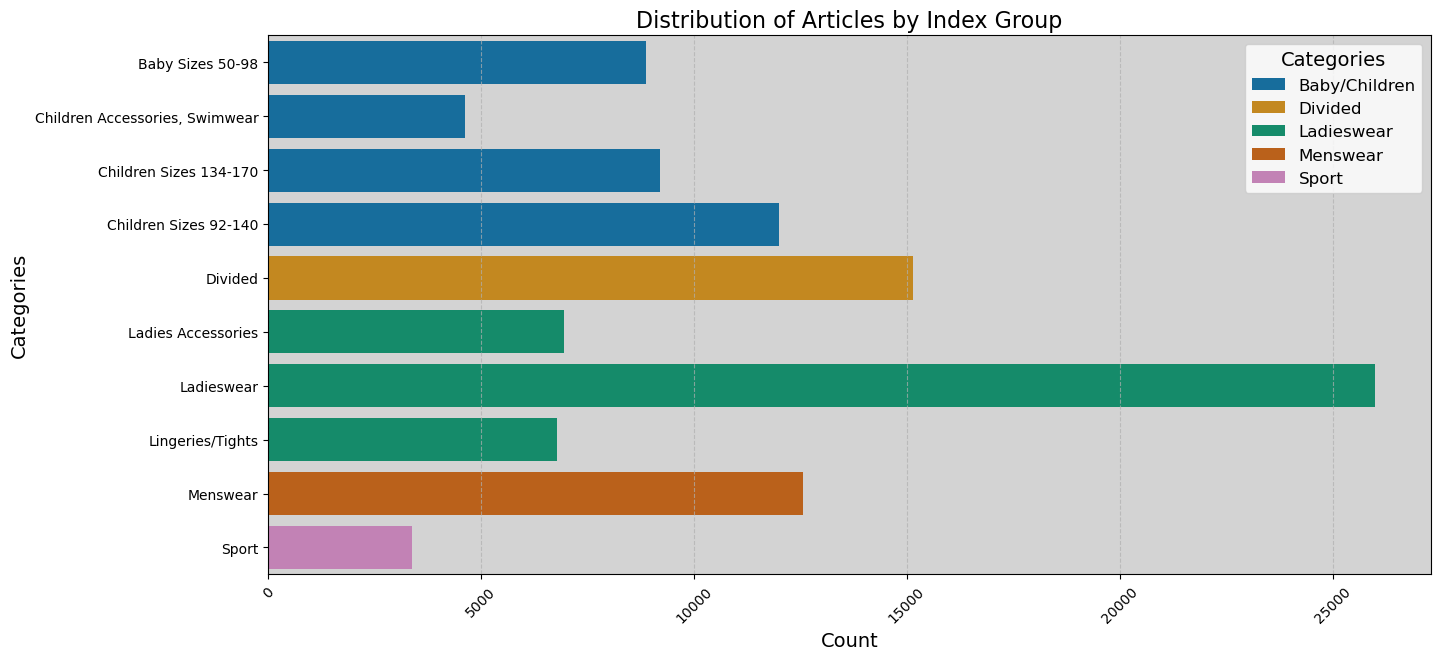

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'index_group_name' and 'index_name', and count the number of articles
grouped_data = articles.groupby(['index_group_name', 'index_name']).count()['article_id'].reset_index()

# Set a visually appealing color palette for the plot
sns.set_palette("colorblind")

# Create a grouped bar plot with Seaborn
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='article_id', y='index_name', hue='index_group_name', data=grouped_data)

# Customize labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.title('Distribution of Articles by Index Group', fontsize=16)

# Add grid lines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase legend font size
plt.legend(title='Categories', title_fontsize='14', fontsize='12')

# Add a light background color
ax.set_facecolor('lightgray')

# Show the plot
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_9924\521501754.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Index Group', title_fontsize='14')


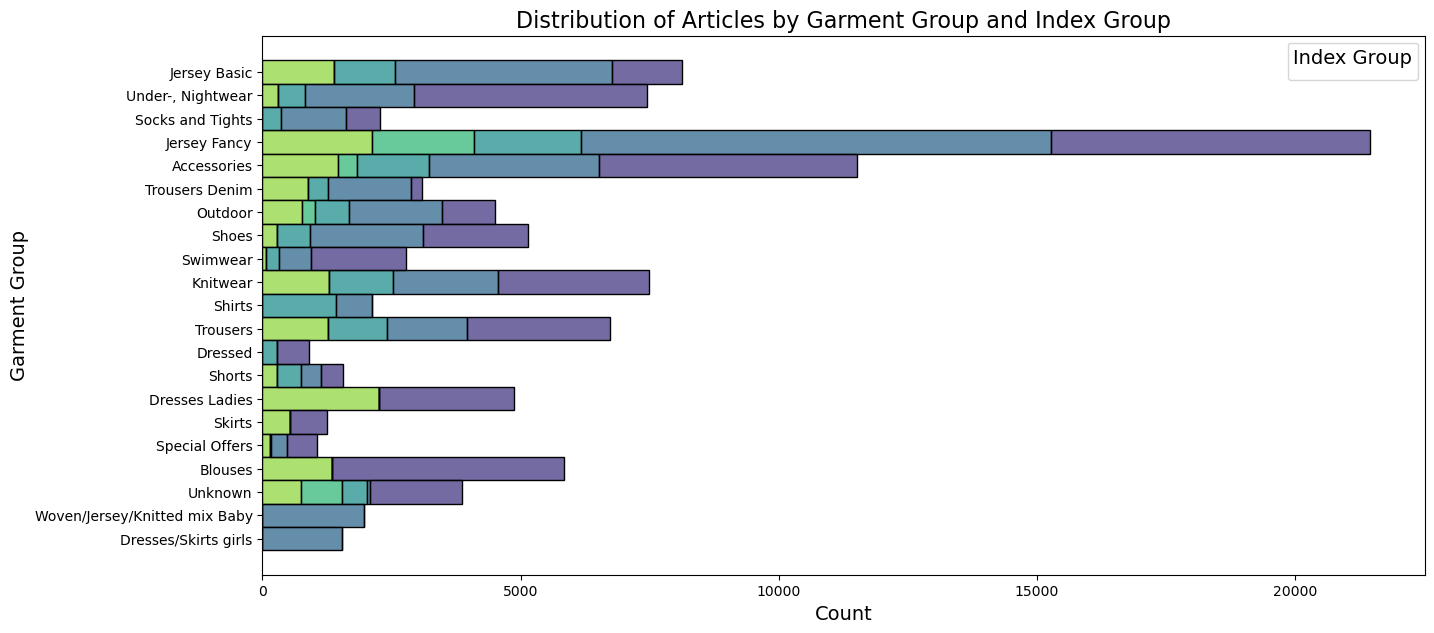

In [27]:
# Set a color palette for the plot
sns.set_palette("husl")

# Create a stacked histogram plot with Seaborn
plt.figure(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack", palette='viridis')

# Customize labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Garment Group', fontsize=14)
plt.title('Distribution of Articles by Garment Group and Index Group', fontsize=16)

# Add a legend for better understanding
plt.legend(title='Index Group', title_fontsize='14')

# Show the plot
plt.show()

In [29]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [31]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [33]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [35]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


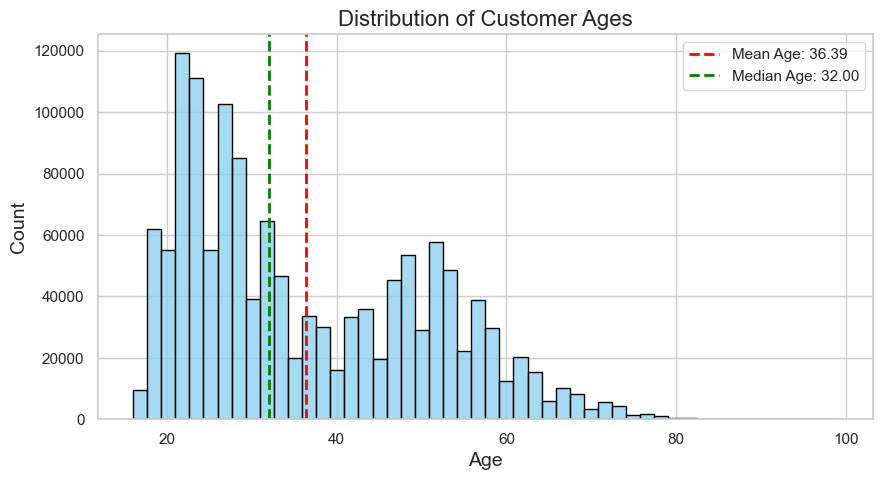

In [37]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=customers, x='age', bins=50, color='skyblue', edgecolor='black')

# Customize labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Customer Ages', fontsize=16)

# Add vertical lines for mean and median
mean_age = customers['age'].mean()
median_age = customers['age'].median()
ax.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
ax.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')

# Add legend
ax.legend()

# Show the plot
plt.show()

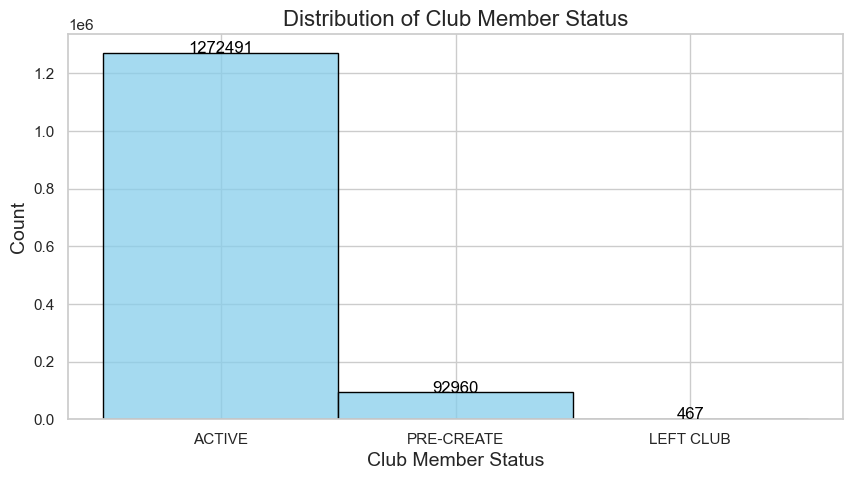

In [39]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=customers, x='club_member_status', color='skyblue', edgecolor='black', discrete=True)

# Customize labels and title
ax.set_xlabel('Club Member Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Club Member Status', fontsize=16)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

# Show the plot
plt.show()

In [41]:
customers['fashion_news_frequency'].unique()


array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [43]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

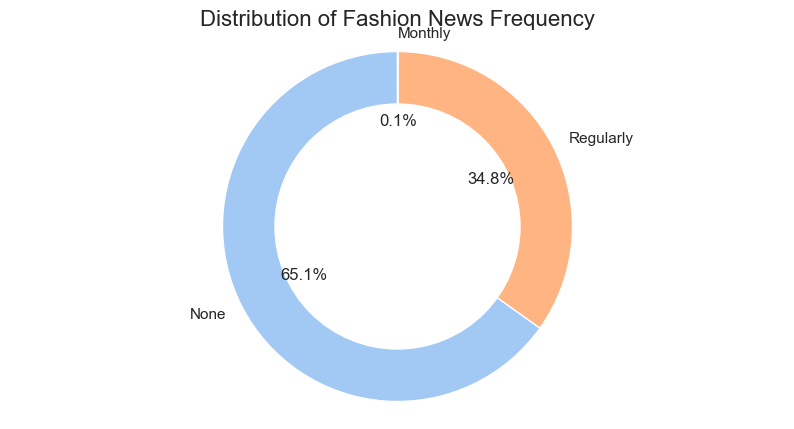

In [45]:
# Grouping data for the pie chart
pie_data = customers['fashion_news_frequency'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = plt.subplot()

# Plotting the pie chart
colors = sns.color_palette('pastel')
ax.pie(pie_data, labels=pie_data.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Draw a circle at the center for a 'donut' chart look
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Customize labels and title
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Distribution of Fashion News Frequency', fontsize=16)

# Show the plot
plt.show()

In [47]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [49]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

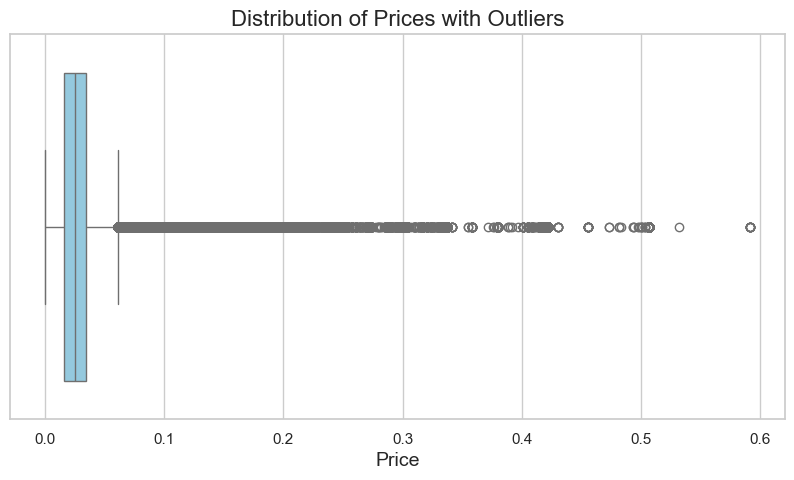

In [53]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=transactions, x='price', color='skyblue')

# Customize labels and title
ax.set_xlabel('Price', fontsize=14)
ax.set_title('Distribution of Prices with Outliers', fontsize=16)

# Show the plot
plt.show()

In [55]:
transactions_byid = transactions.groupby('customer_id').count()

In [57]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [59]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

C:\Users\patel\AppData\Local\Temp\ipykernel_9924\1494656803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name', palette='Set2')


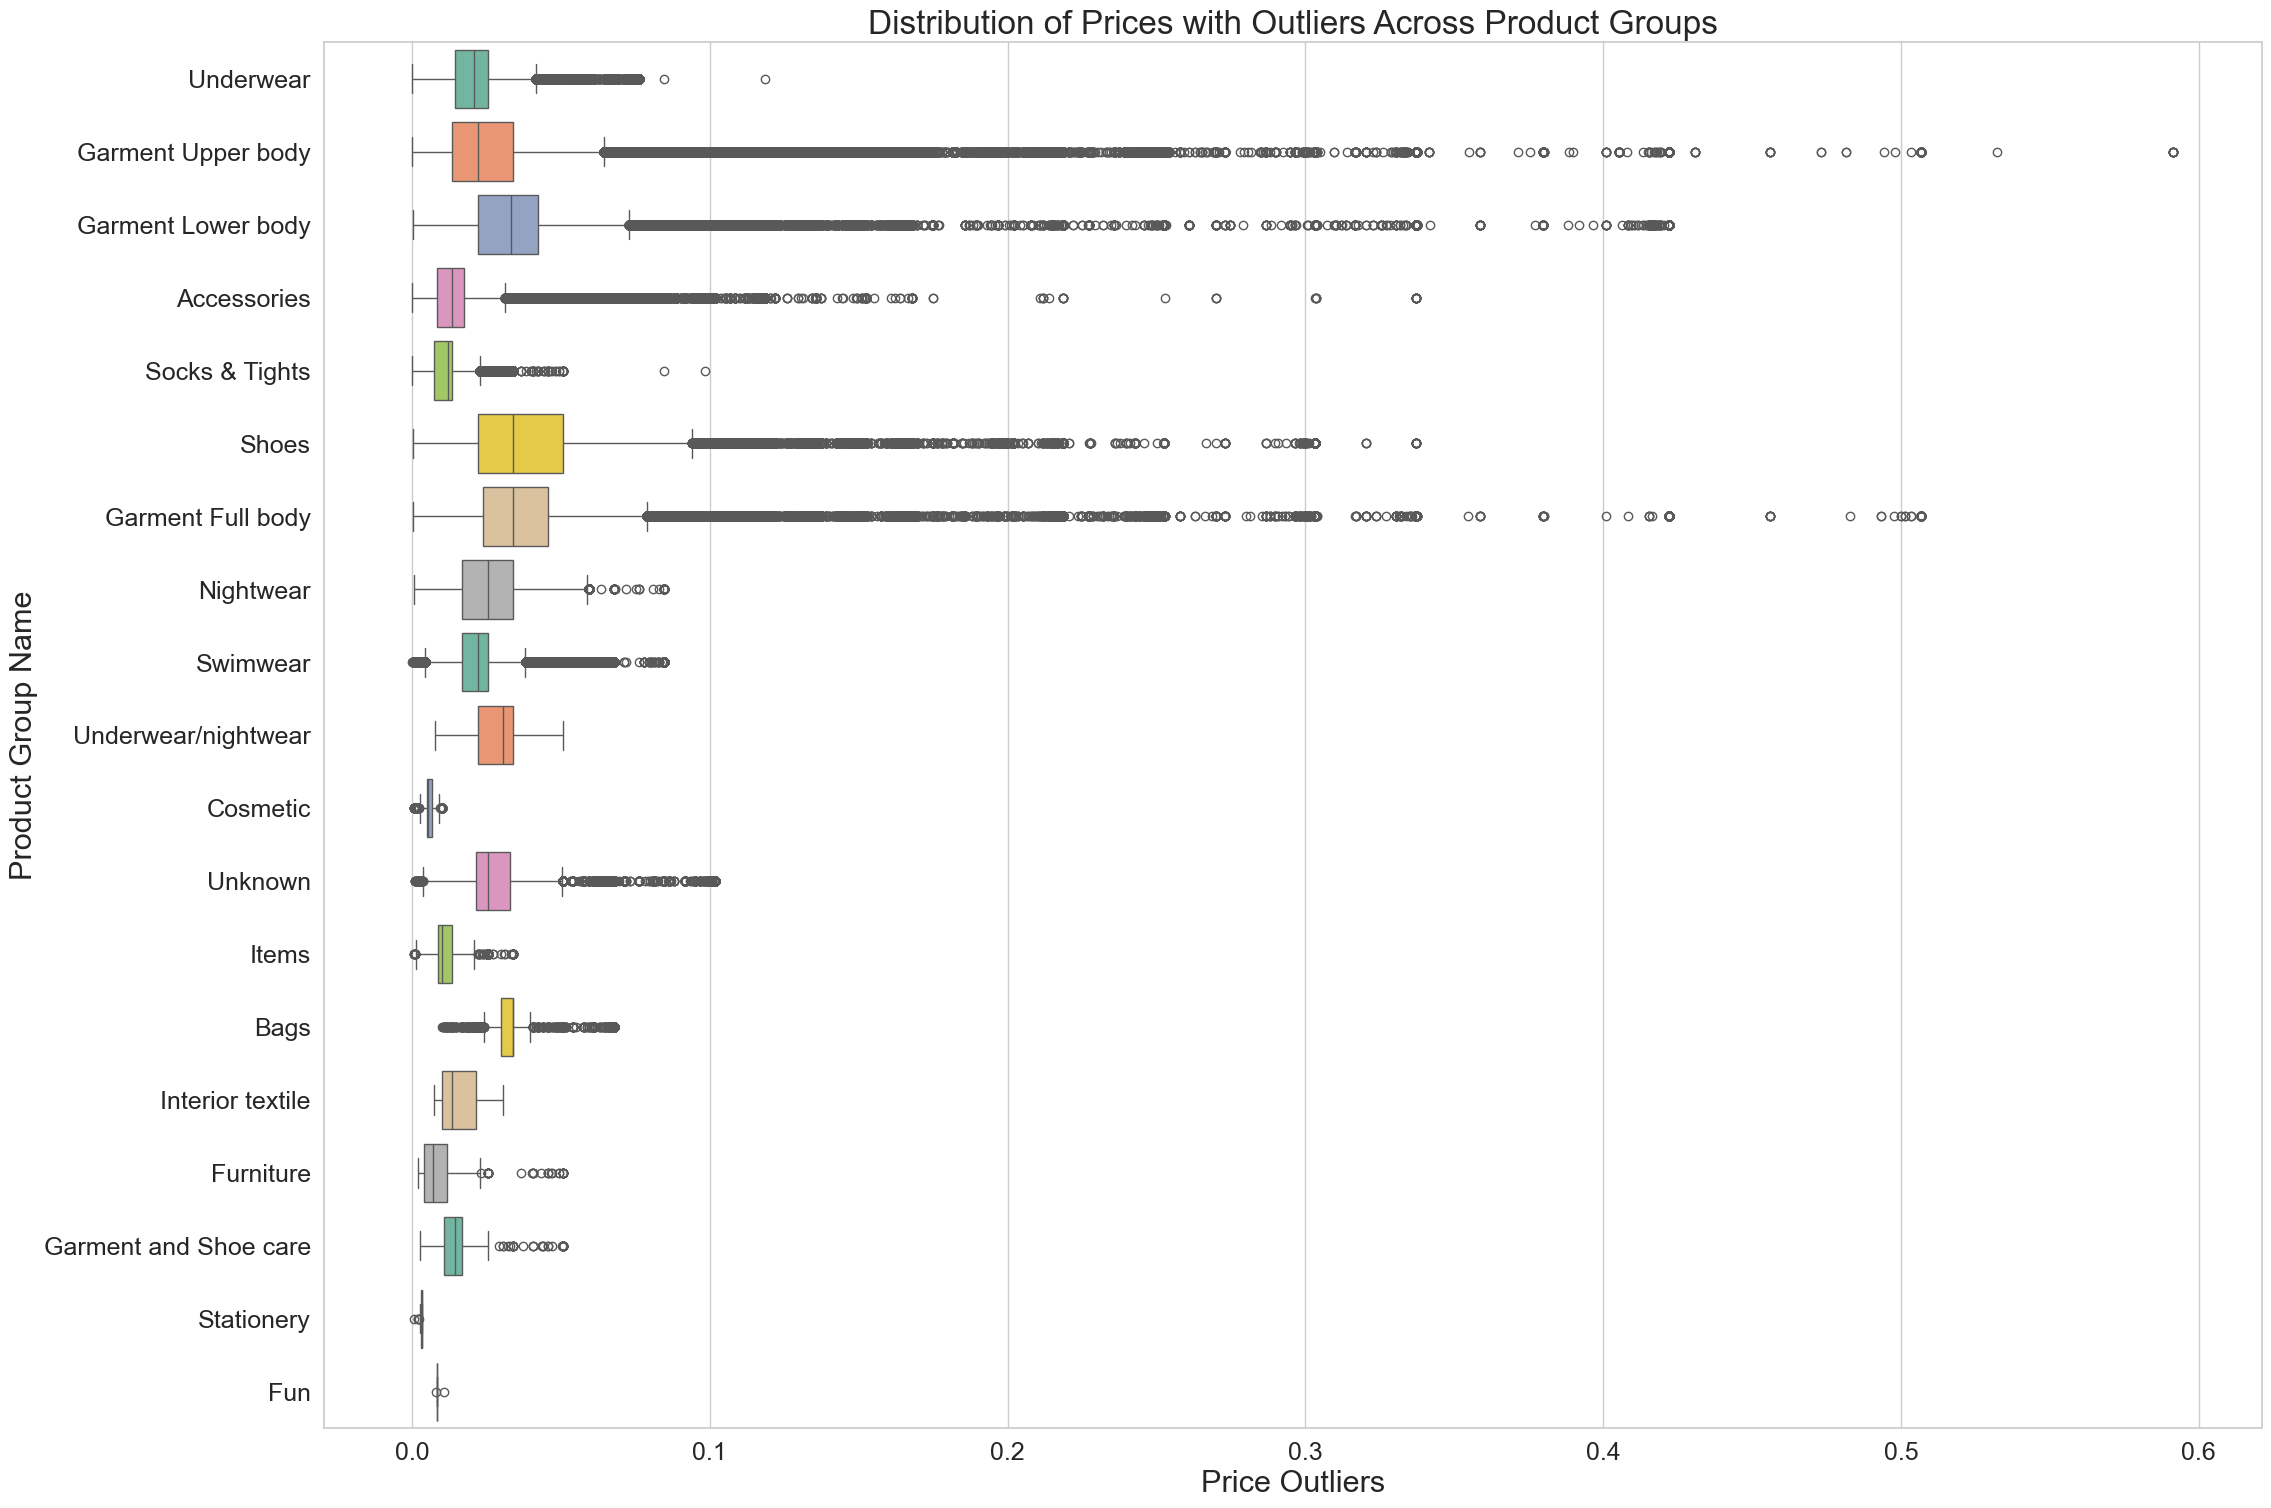

In [61]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
plt.figure(figsize=(25, 18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name', palette='Set2')

# Customize labels and title
ax.set_xlabel('Price Outliers', fontsize=22)
ax.set_ylabel('Product Group Name', fontsize=22)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Distribution of Prices with Outliers Across Product Groups', fontsize=24)

# Show the plot
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_9924\1477996698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=accessories_data, x='price', y='product_type_name', palette='Set2')


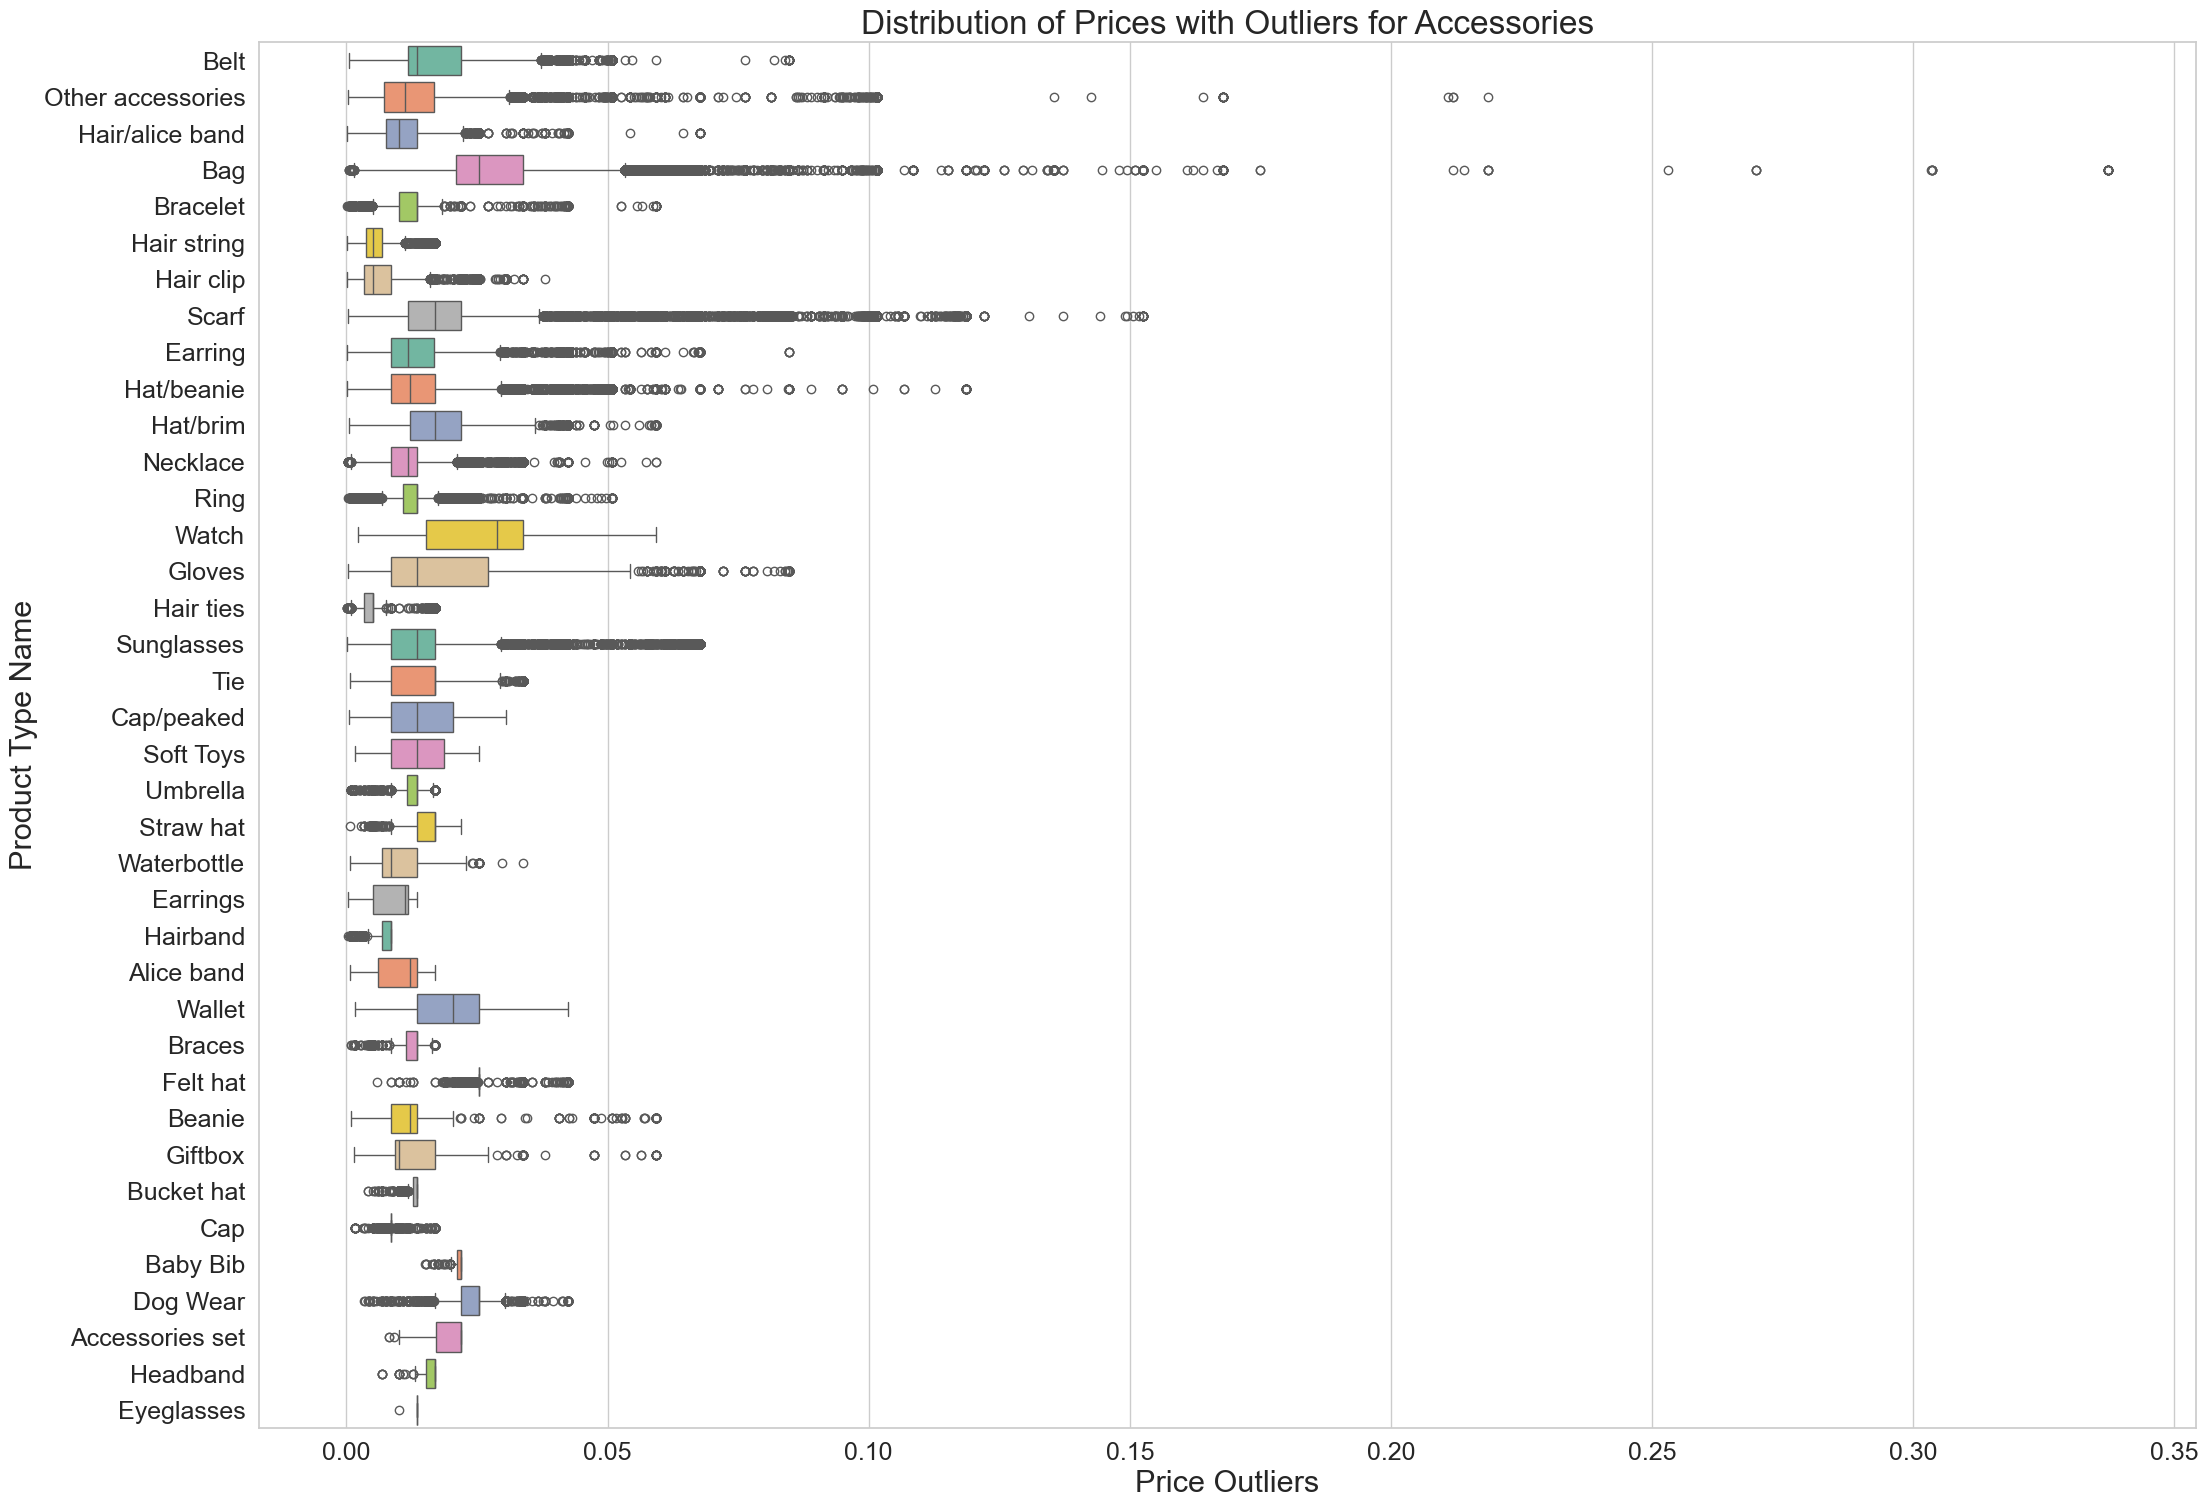

In [63]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Filter data for 'Accessories'
accessories_data = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']

# Create a figure and axis
plt.figure(figsize=(25, 18))
ax = sns.boxplot(data=accessories_data, x='price', y='product_type_name', palette='Set2')

# Customize labels and title
ax.set_xlabel('Price Outliers', fontsize=22)
ax.set_ylabel('Product Type Name', fontsize=22)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Distribution of Prices with Outliers for Accessories', fontsize=24)

# Show the plot
plt.show()

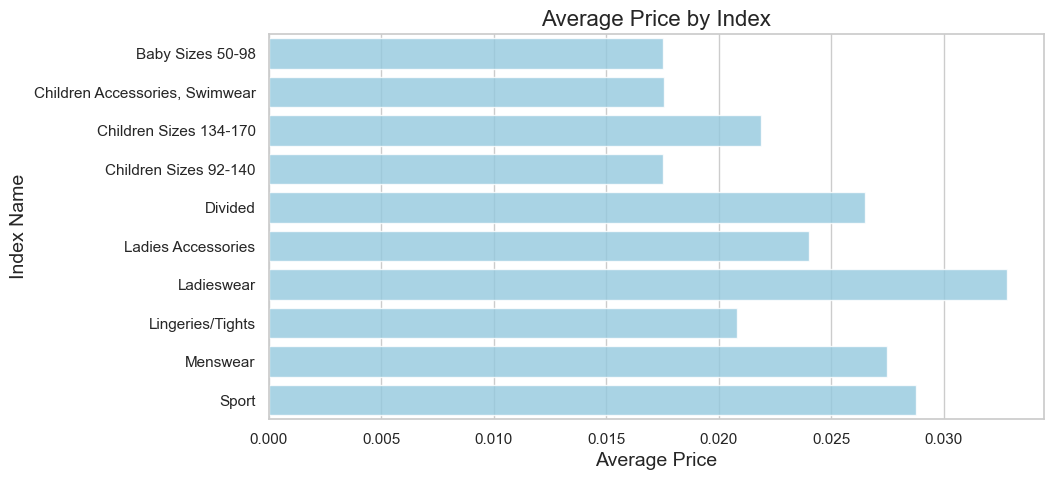

In [65]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Group by 'index_name' and calculate the mean price
articles_index = articles_for_merge.groupby('index_name')['price'].mean().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='price', y='index_name', data=articles_index, color='skyblue', alpha=0.8)

# Customize labels and title
ax.set_xlabel('Average Price', fontsize=14)
ax.set_ylabel('Index Name', fontsize=14)
ax.set_title('Average Price by Index', fontsize=16)

# Show the plot
plt.show()

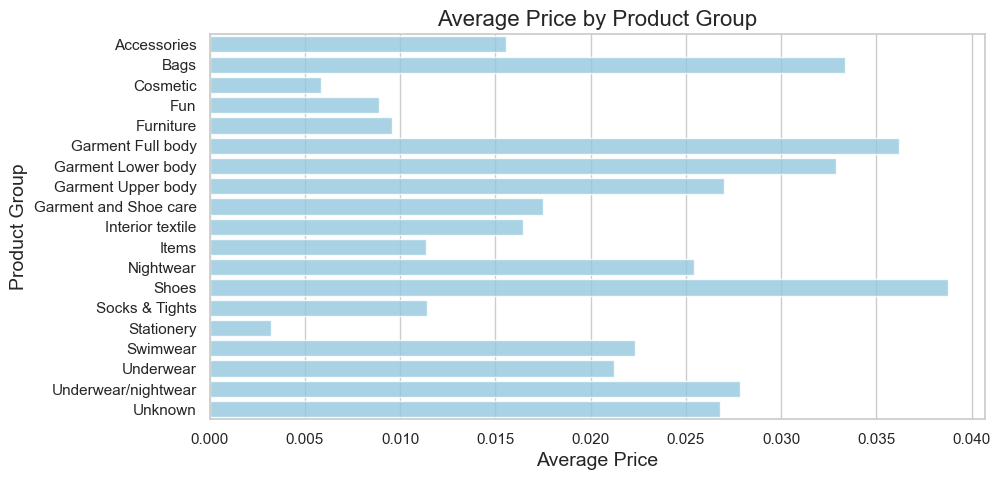

In [67]:
# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Group by 'product_group_name' and calculate the mean price
articles_index = articles_for_merge.groupby('product_group_name')['price'].mean().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='price', y='product_group_name', data=articles_index, color='skyblue', alpha=0.8)

# Customize labels and title
ax.set_xlabel('Average Price', fontsize=14)
ax.set_ylabel('Product Group', fontsize=14)
ax.set_title('Average Price by Product Group', fontsize=16)

# Show the plot
plt.show()

In [69]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

C:\Users\patel\AppData\Local\Temp\ipykernel_9924\592932002.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
C:\Users\patel\AppData\Local\Temp\ipykernel_9924\592932002.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
C:\Users\patel\AppData\Local\Temp\ipykernel_9924\592932002.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
C:\Users\patel\AppData\Local\Temp\ipykernel_9924\592932002.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version

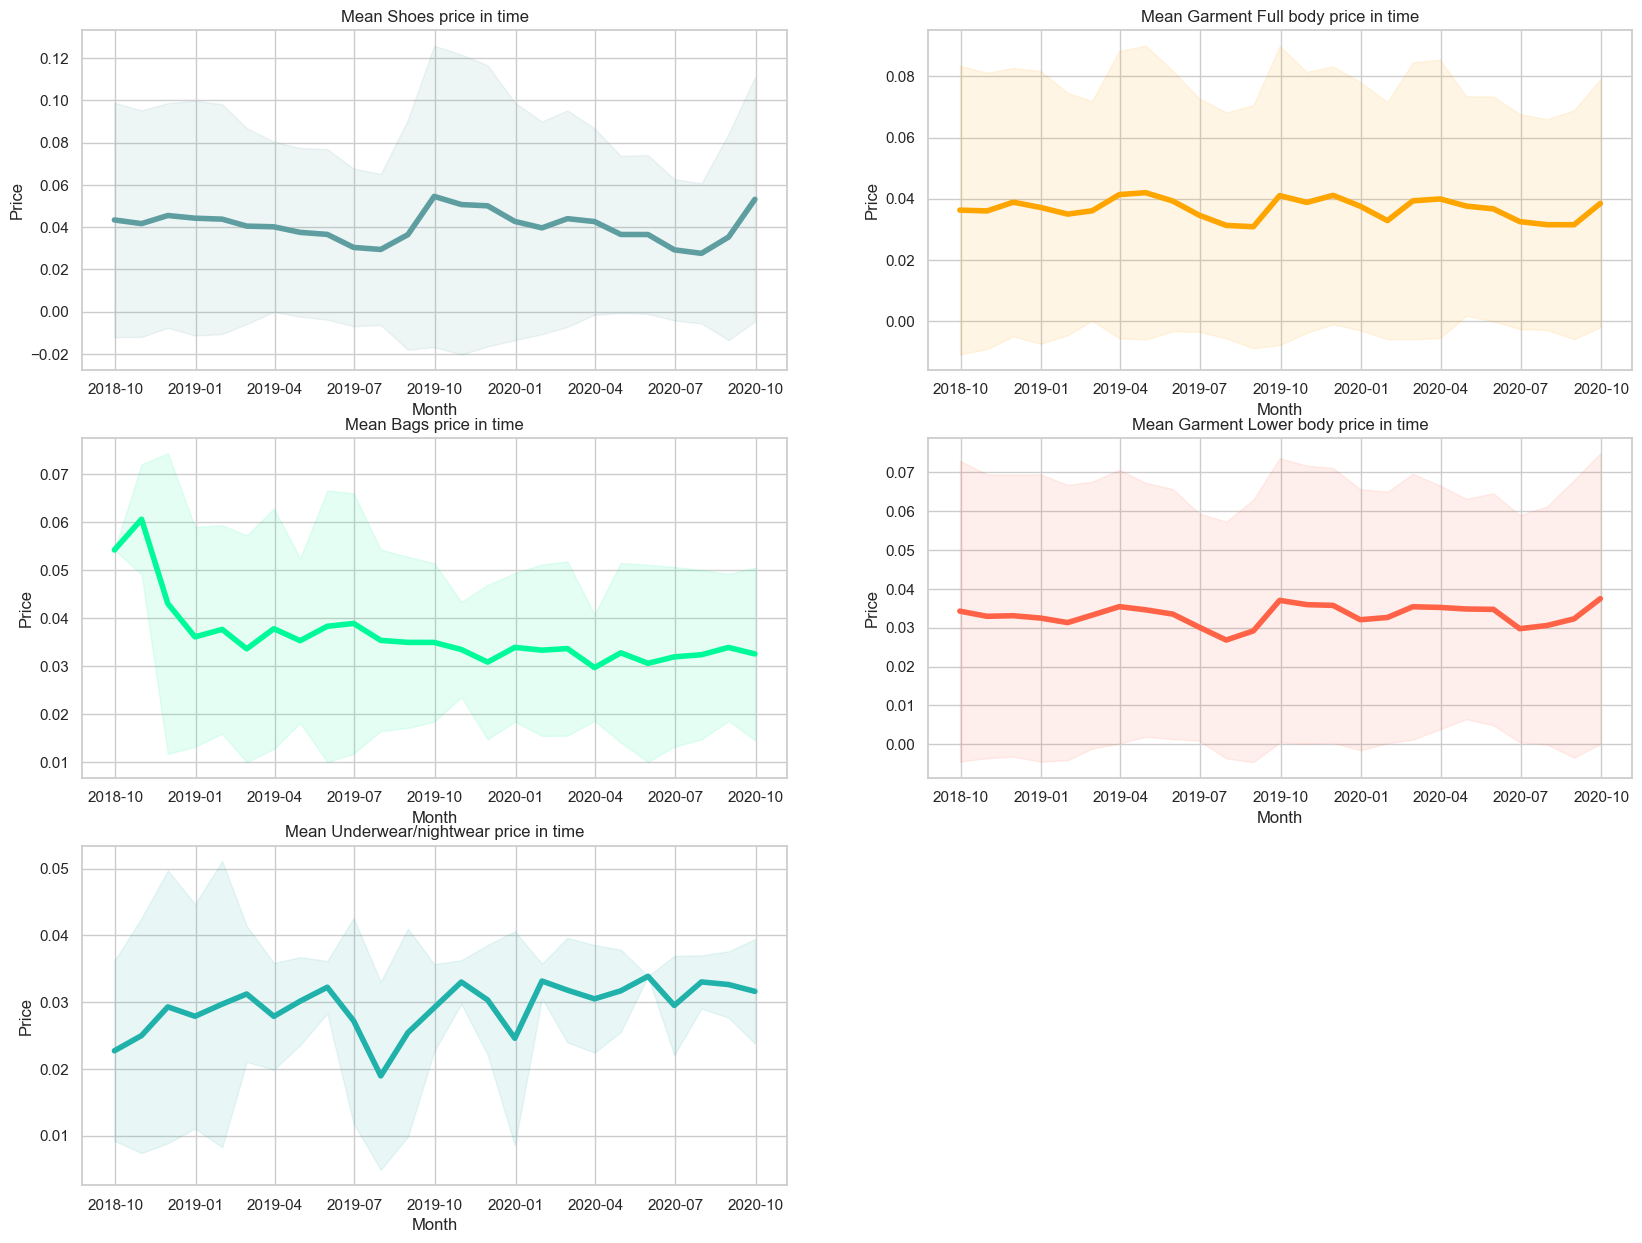

In [71]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0

f, ax = plt.subplots(3, 2, figsize=(20, 15))

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                                   (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('Month')
            ax[i, j].set_ylabel('Price')  # Corrected y-label
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)

plt.show()

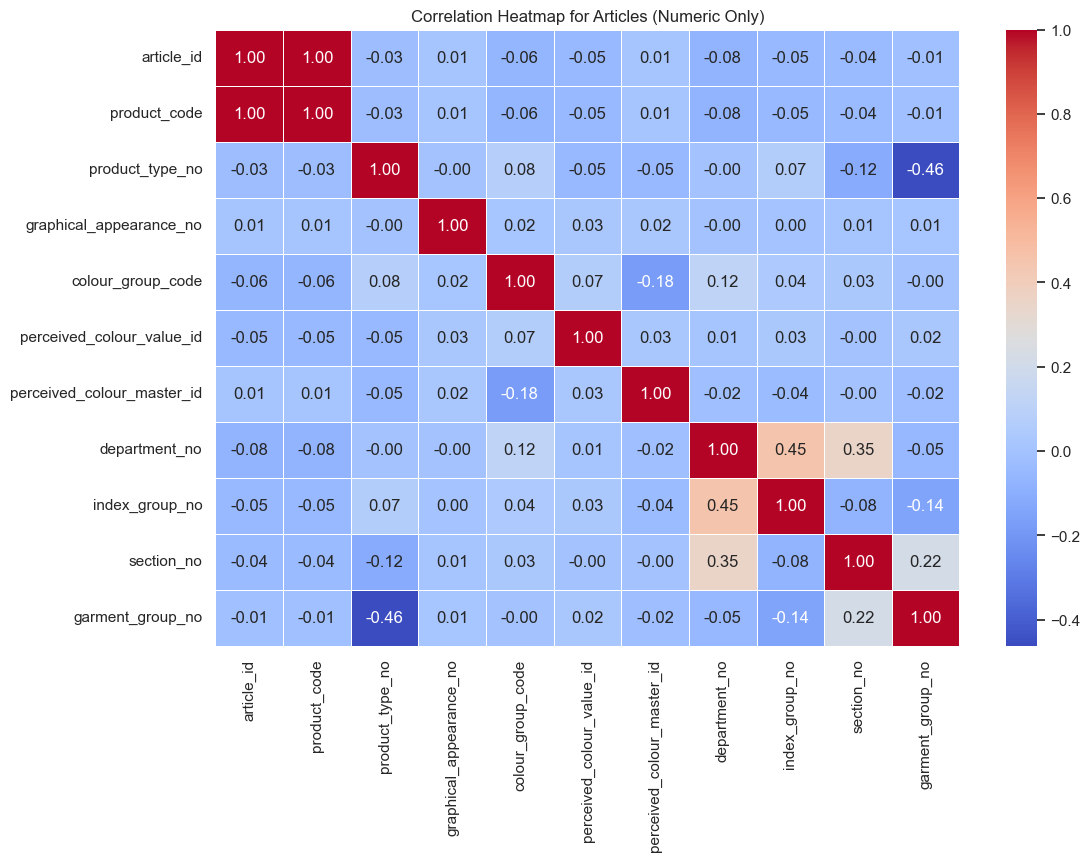

In [73]:
numeric_articles_df = articles.select_dtypes(include='number')

# Calculate correlation matrix
articles_corr = numeric_articles_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(articles_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Articles (Numeric Only)")
plt.show()

In [75]:
numeric_customers_df = customers.select_dtypes(include='number')

# Calculate correlation matrix
customers_corr = numeric_customers_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix for Customers:")
print(customers_corr)


Correlation Matrix for Customers:
        FN  Active    age
FN     NaN     NaN    NaN
Active NaN     NaN    NaN
age    NaN     NaN 1.0000


In [77]:
numeric_transactions_df = transactions.select_dtypes(include='number')

# Calculate correlation matrix
transactions_corr = numeric_transactions_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix for transactions:")
print(transactions_corr)


Correlation Matrix for transactions:
                  article_id  price  sales_channel_id
article_id            1.0000 0.1412            0.0852
price                 0.1412 1.0000            0.1658
sales_channel_id      0.0852 0.1658            1.0000


In [79]:
!pip install sweetviz


   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/15.1 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.9/15.1 MB 10.7 MB/s eta 0:00:02
   ---------------- ----------------------- 6.3/15.1 MB 10.4 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/15.1 MB 10.4 MB/s eta 0:00:01
   --------------------------- ------------ 10.5/15.1 MB 10.1 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/15.1 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------  14.9/15.1 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 15.1/15.1 MB 9.9 MB/s eta 0:00:00


In [81]:
import sweetviz as sv

# Analyze the DataFrame
report = sv.analyze(articles)

# Show the report in a browser
report.show_html("articles_report.html")


C:\Users\patel\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report articles_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [83]:
import sweetviz as sv

# Analyze the DataFrame
report = sv.analyze(customers)

# Show the report in a browser
report.show_html("customer_report_AutoEDA.html")

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report customer_report_AutoEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [85]:
import sweetviz as sv

# Analyze the DataFrame
report = sv.analyze(transactions)

# Show the report in a browser
report.show_html("transactions_report_AutoEDA.html")

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report transactions_report_AutoEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
